<a href="https://colab.research.google.com/github/hishamalboo/Wrangle-and-Analyze-Data---WeRateDogs-/blob/main/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # <font size=5 color=#00b3b3>Wrangle and Analyze Data - WeRateDogs™</font>

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
        <li><a href="#assessingsum">Assessing Summary</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Data Analysis based on wrangled data</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In the following project I am going to gather and analyze data all around the Twitter account <a href = "https://twitter.com/dog_rates">"WeRateDogs"</a>. For that, data is gathered via manual download, programmatical download and over an API. After that I am going to assess this data, define the issues found during the assessment and clean these issues to get a cleaned master dataframe. 


<font size=4 color ='black'> After wrangling data, In Data anlaysis section we will to try to answer the following questions:
<ul>
    
<font size=4 color ='black'>

1- What is the most device used  for Twitter in WeRateDogs™ ?

    
2- What is the most popular dog in WeRateDogs™ ?

    
3- Based on predicted the most likely dog breed, Which breed gets retweeted and favorited the most overall in WeRateDogs™ ?

    
4- Where dose the trend of tweets posted go over time in WeRateDogs™ ?


<a id='sources'></a>
## Data Sources


>1.  WeRateDogs™ Twitter Archive (twitter-archive-enhanced-2.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv">Udacity</a></li>    
>    <li><b>Method of gathering:</b> Manual download</li>
></ul>

>2.  Tweet image predictions (image_predictions.tsv)</li>
><ul>   
>    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">Udacity</a></li>     
>    <li><b>Method of gathering:</b> Programmatical download via Requests</li>
></ul>

>3.  Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">WeRateDogs™</a></li>    
>    <li><b>Method of gathering:</b> API via Tweepy</li>
></ul>


<a id='gathering'></a>
## Data Gathering

#### 1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced-2.csv)



In [6]:
from google.colab import drive
import pandas  as pd
drive.mount('/content/drive')
import requests 
import numpy as np
import pandas as pd 
import tweepy 
import json 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import re 
from datetime import datetime
from tweepy import OAuthHandler
from timeit import default_timer as timer
from IPython.display import display
pd.set_option("display.max_columns", 10000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', 1)
%load_ext google.colab.data_table
# At first I downloaded the file from Udacity. Now the file can be loaded directly from my local disk into a dataframe via Pandas:
df_twitter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WeRateDogs™Twitter profile/wrangle_act_project/twitter-archive-enhanced-2.csv")

df_twitter.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name doggo floofer pupper puppo
0  892420643555336193 NaN                    NaN                   2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                      NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                  13                10                  Phineas   None  None    None   None
1  892177421306343426 NaN                    NaN                   2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                  13                10                  Tilly     None  None    None   None
2  891815181378084864 NaN                    NaN                   2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                  12                10                  Archie    None  None    None   None
3  891689557279858688 NaN                    NaN                   2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                            NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                  13                10                  Darla     None  None    None   None
4  891327558926688256 NaN                    NaN                   2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1  12                10                  Franklin  None  None    None   None

#### 2. Tweet image predictions (image_predictions.tsv)

To gather this data we are going to define the file - url, request this url and write the content of the response to a separate file.

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)
    
df_predict = pd.read_csv("image_predictions.tsv", sep='\t')

df_predict.head()

tweet_id                                          jpg_url  img_num                      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog                   p3   p3_conf  p3_dog
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  1        Welsh_springer_spaniel  0.465074  True    collie              0.156665  True    Shetland_sheepdog    0.061428  True  
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg  1        redbone                 0.506826  True    miniature_pinscher  0.074192  True    Rhodesian_ridgeback  0.072010  True  
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  1        German_shepherd         0.596461  True    malinois            0.138584  True    bloodhound           0.116197  True  
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg  1        Rhodesian_ridgeback     0.408143  True    redbone             0.360687  True    miniature_pinscher   0.222752  True  
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg  1        miniature_pinscher      0.560311  True    Rottweiler          0.243682  True    Doberman             0.154629  True

#### 3. Additional Twitter data (tweet_json.txt)
#### <font size= 2 color='blue'>To gather the data from the Twitter API I created a Twitter developer account and gathered the data via tweepy in <font size =3 color=#cc3300>22/11/2020.</font> This results in a new file called "tweet_json.txt".</font> 

In [ ]:
#keys and token to access the API
consumer_key = '3RJs4XKlgHyebE5zGOoL8vWzU'
consumer_secret = 'B8Lv6JVc7zfrvfpVdMSofzCgY5qCxor3YFMJ5Cxbd5vWAnEjfa'
access_token = '1299051966-SDgv6975V84IShuPBuKXH6sA197jpZzC7Bf2tJW'
access_secret = 'TncfAiFpzVPHpthQxU7abkSMtwNX3Po17pblldEDBsQ3l'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# df_twitter is a DataFrame with the twitter-archive-enhanced-2.csv file
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Rate limit reached. Sleeping for: 404


Success
1079: 739485634323156992
Success
1080: 739238157791694849
Success
1081: 738891149612572673
Success
1082: 738885046782832640
Success
1083: 738883359779196928
Success
1084: 738537504001953792
Success
1085: 738402415918125056
Success
1086: 738184450748633089
Success
1087: 738166403467907072
Success
1088: 738156290900254721
Success
1089: 737826014890496000
Success
1090: 737800304142471168
Success
1091: 737678689543020544
Success
1092: 737445876994609152
Success
1093: 737322739594330112
Success
1094: 737310737551491075
Success
1095: 736736130620620800
Success
1096: 736392552031657984
Success
1097: 736365877722001409
Success
1098: 736225175608430592
Success
1099: 736010884653420544
Success
1100: 735991953473572864
Success
1101: 735648611367784448
Success
1102: 735635087207878657
Success
1103: 735274964362878976
Success
1104: 735256018284875776
Success
1105: 735137028879360001
Success
1106: 734912297295085568
Success
1107: 734787690684657664
Success
1108: 734776360183431168
Success
11

Success
1328: 705975130514706432
Success
1329: 705970349788291072
Success
1330: 705898680587526145
Success
1331: 705786532653883392
Success
1332: 705591895322394625
Success
1333: 705475953783398401
Success
1334: 705442520700944385
Success
1335: 705428427625635840
Success
1336: 705239209544720384
Success
1337: 705223444686888960
Success
1338: 705102439679201280
Success
1339: 705066031337840642
Success
1340: 704871453724954624
Success
1341: 704859558691414016
Success
1342: 704847917308362754
Success
1343: 704819833553219584
Success
1344: 704761120771465216
Success
1345: 704499785726889984
Success
1346: 704491224099647488
Success
1347: 704480331685040129
Success
1348: 704364645503647744
Success
1349: 704347321748819968
Success
1350: 704134088924532736
Success
1351: 704113298707505153
Success
1352: 704054845121142784
Success
1353: 703774238772166656
Success
1354: 703769065844768768
Success
1355: 703631701117943808
Success
1356: 703611486317502464
Success
1357: 703425003149250560
Success
13

Success
1577: 687460506001633280
Success
1578: 687399393394311168
Success
1579: 687317306314240000
Success
1580: 687312378585812992
Success
1581: 687127927494963200
Success
1582: 687124485711986689
Success
1583: 687109925361856513
Success
1584: 687102708889812993
Success
1585: 687096057537363968
Success
1586: 686947101016735744
Success
1587: 686760001961103360
Success
1588: 686749460672679938
Success
1589: 686730991906516992
Success
1590: 686683045143953408
Success
1591: 686618349602762752
Success
1592: 686606069955735556
Success
1593: 686394059078897668
Success
1594: 686386521809772549
Success
1595: 686377065986265092
Success
1596: 686358356425093120
Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
16

Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
18

Rate limit reached. Sleeping for: 400


Success
1979: 672984142909456390
Success
1980: 672980819271634944
Success
1981: 672975131468300288
Success
1982: 672970152493887488
Success
1983: 672968025906282496
Success
1984: 672964561327235073
Success
1985: 672902681409806336
Success
1986: 672898206762672129
Success
1987: 672884426393653248
Success
1988: 672877615439593473
Success
1989: 672834301050937345
Success
1990: 672828477930868736
Success
1991: 672640509974827008
Success
1992: 672622327801233409
Success
1993: 672614745925664768
Success
1994: 672609152938721280
Success
1995: 672604026190569472
Success
1996: 672594978741354496
Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
1999: 672538107540070400
Success
2000: 672523490734551040
Success
2001: 672488522314567680
Success
2002: 672482722825261057
Success
2003: 672481316919734272
Success
2004: 672475084225949696
Success
2005: 672466075045466113
Success
2006: 672272411274932228
Success
2007: 672267570918129665
Success
2008: 672264251789176834
Success
20

Success
2228: 668268907921326080
Success
2229: 668256321989451776
Success
2230: 668248472370458624
Success
2231: 668237644992782336
Success
2232: 668226093875376128
Success
2233: 668221241640230912
Success
2234: 668204964695683073
Success
2235: 668190681446379520
Success
2236: 668171859951755264
Success
2237: 668154635664932864
Success
2238: 668142349051129856
Success
2239: 668113020489474048
Success
2240: 667937095915278337
Success
2241: 667924896115245057
Success
2242: 667915453470232577
Success
2243: 667911425562669056
Success
2244: 667902449697558528
Success
2245: 667886921285246976
Success
2246: 667885044254572545
Success
2247: 667878741721415682
Success
2248: 667873844930215936
Success
2249: 667866724293877760
Success
2250: 667861340749471744
Success
2251: 667832474953625600
Success
2252: 667806454573760512
Success
2253: 667801013445750784
Success
2254: 667793409583771648
Success
2255: 667782464991965184
Success
2256: 667773195014021121
Success
2257: 667766675769573376
Success
22

In [7]:
# Create a dataframe called "df_api" from read the created text file : 
api_data = []

#read the created file:
with open("/content/drive/MyDrive/Colab Notebooks/WeRateDogs™Twitter profile/wrangle_act_project/tweet_json.txt", "r", encoding = 'utf8') as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.head()

tweet_id  retweet_count  favorite_count  retweeted display_text_range
0  892420643555336193  7477           35392           False      [0, 85]          
1  892177421306343426  5549           30639           False      [0, 138]         
2  891815181378084864  3671           23036           False      [0, 121]         
3  891689557279858688  7650           38693           False      [0, 79]          
4  891327558926688256  8249           36967           False      [0, 138]

<a id='assessing'></a>
## Data Assessing
### `Now we are going to look for issues with the quality or the tidiness of the data and its dimensions.`

### `df_twitter`


#### <font color='blue'>1- Let's  look for missing data.</font> 

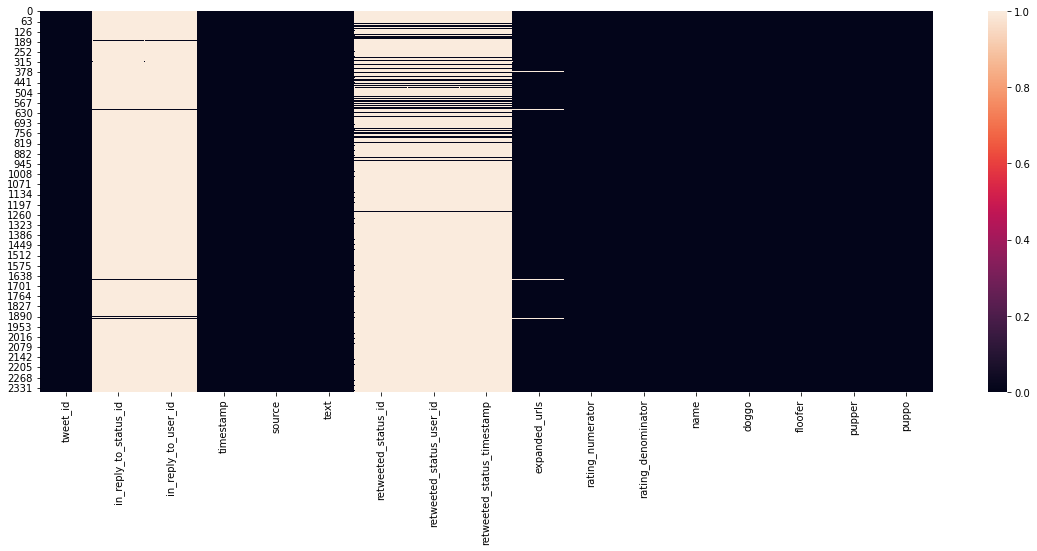

In [8]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_twitter.isnull(), vmin=0, vmax = 1)

In [9]:
df_twitter.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [10]:
df_twitter.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                    expanded_urls  rating_numerator  rating_denominator     name doggo floofer pupper puppo
414   822859134160621569 NaN                    NaN                   2017-01-21 17:31:20 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Hobbes. He was told he was going to the park. Ended up at the vet. H*ckin bamboozled. Quite pupset with you. 12/10 https://t.co/SSQE06XClS NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/822859134160621569/photo/1  12                10                  Hobbes   None  None    None   None
338   832369877331693569 NaN                    NaN                   2017-02-16 23:23:38 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d           NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/832369877331693569/photo/1  11                10                  Charlie  None  None    None   None
1716  680206703334408192 NaN                    NaN                   2015-12-25 02:01:30 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  I hope everyone enjoys this picture as much as I do. This is Toby. 12/10 https://t.co/vHnu1g9EJm                                                   NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/680206703334408192/photo/1  12                10                  Toby     None  None    None   None
1405  699323444782047232 NaN                    NaN                   2016-02-15 20:04:36 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  "I'm bathing the children what do you want?"  ...both 10/10 https://t.co/Rizm1LWh4z                                                                NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/699323444782047232/photo/1  10                10                  None     None  None    None   None
2348  666055525042405380 NaN                    NaN                   2015-11-16 00:49:46 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt       NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/666055525042405380/photo/1  10                10                  a        None  None    None   None

### During the visual assessment we can observe that:


- There is a lot of missing data in the columns about the reply and the retweeted status. Since we only want original posts with images, we have to drop them later - the missing data in the "expanded_urls" column will also disappear with that cleaning operation.

- not all tweets could be classified as doggo, floofer, pupper or puppo and all columns contain "None"

- the source contains unnecessary HTML code

- there is the name "None" in the name column

####  <font color='blue'>2-Let's look for the datatypes for each columns in df_twitter  if they are correct or not.</font> 

In [11]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### There are two columns' datatypes are incorrect:

- tweet_id column is int  should be a str
- timestamp column is str should be datetime 

####  <font color='blue'>3-Let's see how many wrong names we can find.</font>



In [16]:
df_twitter.name.value_counts()

None              745
a                 55 
Charlie           12 
Cooper            11 
Oliver            11 
Lucy              11 
Penny             10 
Tucker            10 
Lola              10 
Bo                9  
Winston           9  
Sadie             8  
the               8  
Daisy             7  
Bailey            7  
an                7  
Buddy             7  
Toby              7  
Rusty             6  
Dave              6  
Bella             6  
Koda              6  
Scout             6  
Milo              6  
Stanley           6  
Oscar             6  
Leo               6  
Jack              6  
Jax               6  
Finn              5  
Sammy             5  
Louis             5  
Gus               5  
Bentley           5  
Oakley            5  
George            5  
Alfie             5  
Sunny             5  
Chester           5  
Phil              5  
Larry             5  
very              5  
Jerry             4  
Duke              4  
Ruby              4  
Clarence  

#### As we can see, the name column contains wrong names like "None", "a","quite" ,"the", "an","my","light", "very","just","space","actually"

####  <font color='blue'>4-Let's see if df_twitter has duplicated or not.</font>

In [17]:
df_twitter[df_twitter.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### As we can see, there is no duplicated observation in df_twitter.

####  <font color='blue'>5-Let's  see in how many cases there were no classification of dog_size possible via text processing.</font>


In [18]:
#returns true if there is no dog classification in any of the columns

df_twitter[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False    380 
dtype: int64

In [19]:
# Calculate the percentage of  not missing rows:
(df_twitter["doggo"].value_counts().iloc[1]+df_twitter["floofer"].value_counts().iloc[1]+df_twitter["pupper"].value_counts().iloc[1]+\
 df_twitter["puppo"].value_counts().iloc[1])/len(df_twitter)

0.16723259762308998

#### We observe that only  17% of the rows the data is not missing.

### Let's take a look at the ratings. By what we have seen so far, it looks like the ratings have always a format of 13/10 or 12/10 and so on. 
#### ` We would expect a numerator > 10 and denominator = 10`.



In [20]:
df_twitter['rating_numerator'].value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

#### We can observe that there is a wide range of numbers as rating_numerator, with a maximum of 1776.



In [21]:
df_twitter.query("rating_numerator == '1776'").text

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

In [22]:
df_twitter.query("rating_numerator == '0'").text

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

#### This rating is correct ,so a lot higher values  "over 10" would be valid to this rating system.

### Let's try with smaller rating_numerator.

In [23]:
df_twitter.query("rating_numerator == '1'").text

605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1446    After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me                                       
1869    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
1940    The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you                                                    
2038    After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes     
2091    Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO    
2261    Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not e

#### As we see: 
- The entry 605 shows that page doesn’t exist.
-  The entry 1869 shows that the picture  was sent without dog, it takes rating 1/10
- The entry 2335 the rating got extracted wrongly (misinterpreted the 1/2 of 3 1/2 as the rating).

#### Also, this rating is correct ,so a lot lower values  "under or equal 10" would be valid to this rating system.

### Let's make the same check for the denominator.

In [24]:
df_twitter['rating_denominator'].value_counts().sort_index()

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

#### We can observe that there is a wide range of numbers as rating_denominator, with a maximum of 170.


In [25]:
df_twitter.query("rating_denominator == '170'").text

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

In [26]:
df_twitter.query("rating_denominator == '0'").text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [27]:
df_twitter.query("rating_denominator == '7'").text

516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object

### The same problems as for the numerator. Multiple Dogs or multiple occurences of the pattern \d+\/\d+ and ratings provided in decimals are not extracted correctly.
 
#### Lets extract this by our self and see what we get.
 
  #### Now let's create a copy of the twitter dataframe for further assessing.



In [28]:
df_twitter_assess = df_twitter.copy()

In [29]:
# we could expect an integer rating on what we saw, but maybe some floats are the case:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 

# extracting the ratings and insert them in column called 'rating':
df_twitter_assess["rating"] = df_twitter_assess.text.str.extract(pattern, expand = True)[0]

# slipt ratings and insert them in two columns num=number , denom = denominator:
df_twitter_assess[['num', 'denom']] = df_twitter_assess['rating'].str.split('/', n=1, expand=True)

df_twitter_assess.rating_numerator = df_twitter_assess.rating_numerator.astype("str")
df_twitter_assess.rating_denominator = df_twitter_assess.rating_denominator.astype("str")

In [30]:
df_twitter_assess.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                    expanded_urls rating_numerator rating_denominator      name doggo floofer pupper puppo rating num denom
0  892420643555336193 NaN                    NaN                   2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                      NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                  13               10                 Phineas   None  None    None   None  13/10  13  10  
1  892177421306343426 NaN                    NaN                   2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                  13               10                 Tilly     None  None    None   None  13/10  13  10  
2  891815181378084864 NaN                    NaN                   2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                  12               10                 Archie    None  None    None   None  12/10  12  10  
3  891689557279858688 NaN                    NaN                   2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                            NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                  13               10                 Darla     None  None    None   None  13/10  13  10  
4  891327558926688256 NaN                    NaN                   2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1  12               10                 Franklin  None  None    None   None  12/10  12  10

In [31]:
#look for differences in the original numerator and the new extract:
df_twitter_assess["check_num"] = df_twitter_assess[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

In [32]:
df_twitter_assess.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                    expanded_urls rating_numerator rating_denominator      name doggo floofer pupper puppo rating num denom  check_num
0  892420643555336193 NaN                    NaN                   2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                      NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/892420643555336193/photo/1                                                                  13               10                 Phineas   None  None    None   None  13/10  13  10    True     
1  892177421306343426 NaN                    NaN                   2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                  13               10                 Tilly     None  None    None   None  13/10  13  10    True     
2  891815181378084864 NaN                    NaN                   2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                  12               10                 Archie    None  None    None   None  12/10  12  10    True     
3  891689557279858688 NaN                    NaN                   2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                            NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                  13               10                 Darla     None  None    None   None  13/10  13  10    True     
4  891327558926688256 NaN                    NaN                   2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f NaN                  NaN                        NaN                        https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1  12               10                 Franklin  None  None    None   None  12/10  12  10    True

#### Cheke if there are the different patterns of rating:

In [33]:
df_twitter_assess.check_num.value_counts()

True     2349
False    7   
Name: check_num, dtype: int64

In [34]:
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

rating_numerator    num  check_num
45    5                13.5   False    
340   75               9.75   False    
387   7                007    False    
695   75               9.75   False    
763   27               11.27  False    
1689  5                9.5    False    
1712  26               11.26  False

`These are the differences we found by extracting the first occurrence of the pattern. These ratings got transformed to integers and are therefore wrong.`

#### Let's repeat this for the denominator.



In [35]:
df_twitter_assess["check_denom"] = df_twitter_assess[["rating_denominator", "denom"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)

#### Cheke if there are the different patterns of rating:

In [36]:
df_twitter_assess.check_denom.value_counts()


True     2355
False    1   
Name: check_denom, dtype: int64

In [38]:
df_twitter_assess.query("check_denom == False")[["rating_denominator", "denom","check_denom"]]

rating_denominator denom  check_denom
313  0                  00    False

`I think it is no problem about it.`

####  <font color='blue'>6-Now we should assess how often there are multiple occurences of the "rating pattern" in one tweet.</font>

In [39]:
df_twitter_assess["count"] = df_twitter_assess.text.str.count(pattern)

In [40]:
df_twitter_assess[["text", "count"]].query("count != 1")

text  count
55    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                          2    
313   @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                   2    
561   RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                   2    
766   "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                  2    
784   RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…         2    
860   RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…         2    
1007  This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ                     2    
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ         2    
1165  Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                     2    
1202  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                2    
1222  Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE     2    
1359  This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf               2    
1459  This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P           2    
1465  Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ  2    
1508  When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM     2    
1525  This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf       2    
1538  Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c  2    
1662  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5          2    
1795  Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C    2    
1832  These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC            2    
1897  Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh     2    
1901  Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD        2    
1970  Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg         2    
2010  10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k                                                      3    
2064  Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/1

#### We can observe that:

##### - this data contains retweets (as mentioned before)
##### - sometimes there are multiple dogs/cats or else in one picture
##### - some of these ratings are not clear

### `df_predict`


#### <font color='blue'>1- Let's  look for missing data.</font> 

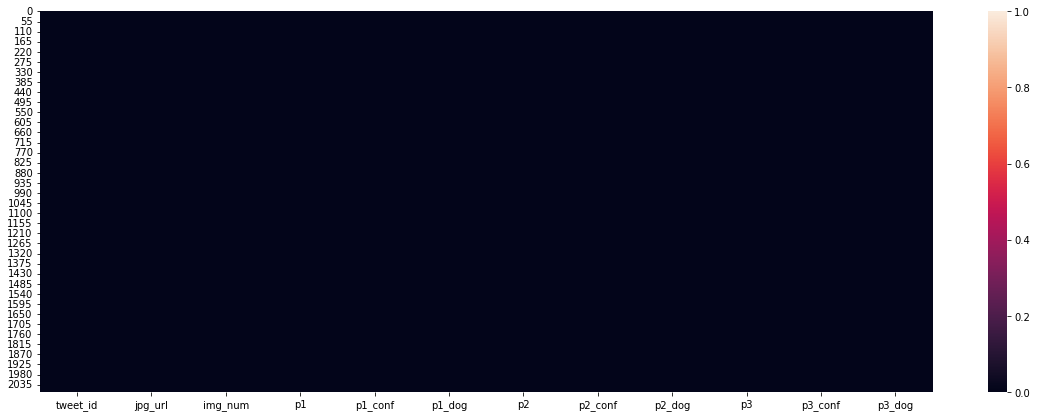

In [41]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_predict.isnull(), vmin=0, vmax = 1)

In [42]:
df_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### It sounds good , there are no missing data.
#### Let's look for dataset by the visual assessment:

In [43]:
df_predict.sample(10)

tweet_id                                          jpg_url  img_num                           p1   p1_conf  p1_dog                          p2   p2_conf  p2_dog                      p3   p3_conf  p3_dog
247   670668383499735048  https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg  1        banana                       0.107317  False   orange                      0.099662  False   bagel                   0.089033  False 
397   673662677122719744  https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg  1        Labrador_retriever           0.957670  True    beagle                      0.012413  True    golden_retriever        0.005689  True  
1453  776819012571455488  https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg  3        Chihuahua                    0.346545  True    dalmatian                   0.166246  True    toy_terrier             0.117502  True  
959   705591895322394625  https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg  1        basenji                      0.877207  True    Italian_greyhound           0.047854  True    miniature_pinscher      0.035638  True  
883   698907974262222848  https://pbs.twimg.com/media/CbMFFssWIAAyuOd.jpg  3        German_short-haired_pointer  0.983131  True    bluetick                    0.005558  True    curly-coated_retriever  0.003322  True  
1239  746872823977771008  https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg  1        Pembroke                     0.540201  True    beagle                      0.207835  True    Italian_greyhound       0.043565  True  
187   669367896104181761  https://pbs.twimg.com/media/CUoSjTnWwAANNak.jpg  1        basset                       0.749394  True    beagle                      0.133579  True    Welsh_springer_spaniel  0.030198  True  
938   703631701117943808  https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg  2        window_shade                 0.909533  False   window_screen               0.011427  False   brass                   0.008882  False 
605   679862121895714818  https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg  1        EntleBucher                  0.523206  True    Greater_Swiss_Mountain_dog  0.431657  True    Appenzeller             0.044208  True  
547   677331501395156992  https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg  1        beagle                       0.313464  True    boxer                       0.218503  True    French_bulldog          0.106462  True

We can see that:

- the predicitions are sometimes lowercase, sometimes uppercase
- there is an underscore instead of a whitespace between the words
- there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

####  <font color='blue'>2-Let's look for the datatypes for each columns in df_predict  if they are correct or not.</font> 

In [44]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### tweet_id column is int  should be a str.

####  <font color='blue'>3-Let's see if df_predict has duplicated or not.</font>

In [45]:
df_predict[df_predict.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

### In general, there is no duplicated data, but because we deal with social media data , may sometime retweets the picture let's check the jpg_url column:

In [46]:
df_predict[df_predict.jpg_url.duplicated()].head()

tweet_id                                                                                  jpg_url  img_num                  p1   p1_conf  p1_dog                p2   p2_conf  p2_dog                           p3   p3_conf  p3_dog
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg  1        upright             0.303415  False   golden_retriever  0.181351  True    Brittany_spaniel             0.162084  True  
1315  754874841593970688  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                          1        pug                 0.272205  True    bull_mastiff      0.251530  True    bath_towel                   0.116806  False 
1333  757729163776290825  https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                          2        cash_machine        0.802333  False   schipperke        0.045519  True    German_shepherd              0.023353  True  
1345  759159934323924993  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                          1        Irish_terrier       0.254856  True    briard            0.227716  True    soft-coated_wheaten_terrier  0.223263  True  
1349  759566828574212096  https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                          1        Labrador_retriever  0.967397  True    golden_retriever  0.016641  True    ice_bear                     0.014858  False

In [47]:
df_predict[df_predict.jpg_url == "https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg"]

tweet_id                                                                                  jpg_url  img_num       p1   p1_conf  p1_dog                p2   p2_conf  p2_dog                p3   p3_conf  p3_dog
480   675354435921575936  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg  1        upright  0.303415  False   golden_retriever  0.181351  True    Brittany_spaniel  0.162084  True  
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg  1        upright  0.303415  False   golden_retriever  0.181351  True    Brittany_spaniel  0.162084  True

`We can observe from above there are duplicated rows in column jpg_url.`

####  <font color='blue'>4-Let's check the pictures contain dogs or not.</font>

In [48]:
df_predict.query("p1_dog == False and p2_dog == False and p3_dog == False")

tweet_id                                                                                  jpg_url  img_num                   p1   p1_conf  p1_dog                    p2       p2_conf  p2_dog                        p3       p3_conf  p3_dog
6     666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg                                          1        box_turtle           0.933012  False   mud_turtle            4.588540e-02  False   terrapin                  1.788530e-02  False 
17    666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg                                          1        hen                  0.965932  False   cock                  3.391940e-02  False   partridge                 5.206580e-05  False 
18    666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg                                          1        desktop_computer     0.086502  False   desk                  8.554740e-02  False   bookcase                  7.947970e-02  False 
21    666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg                                          1        three-toed_sloth     0.914671  False   otter                 1.525000e-02  False   great_grey_owl            1.320720e-02  False 
25    666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg                                          1        guinea_pig           0.996496  False   skunk                 2.402450e-03  False   hamster                   4.608630e-04  False 
29    666411507551481857  https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg                                          1        coho                 0.404640  False   barracouta            2.714850e-01  False   gar                       1.899450e-01  False 
45    666786068205871104  https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg                                          1        snail                0.999888  False   slug                  5.514170e-05  False   acorn                     2.625800e-05  False 
50    666837028449972224  https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg                                          1        triceratops          0.442113  False   armadillo             1.140710e-01  False   common_iguana             4.325530e-02  False 
51    666983947667116034  https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg                                          1        swab                 0.589446  False   chain_saw             1.901420e-01  False   wig                       3.450970e-02  False 
53    667012601033924608  https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg                                          1        hyena                0.987230  False   African_hunting_dog   1.260080e-02  False   coyote                    5.735010e-05  False 
56    667065535570550784  https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg                                          1        jigsaw_puzzle        0.560001  False   doormat               1.032590e-01  False   space_heater              4.256800e-02  False 
69    667188689915760640  https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg                                          1        vacuum               0.335830  False   swab                  2.652780e-01  False   toilet_tissue             1.407030e-01  False 
73    667369227918143488  https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg                                          1        teddy                0.709545  False   bath_towel            1.272850e-01  False   Christmas_stocking        2.856750e-02  False 
77    667437278097252352  https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg                                          1        porcupine            0.989154  False   bath_towel            6.300490e-03  False   badger                    9.663400e-04  False 
78    667443425659232256  https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg                                          1        goose                0.980815  False   drake                 6.917770e-03  False  

In [50]:
df_predict.query("p1_dog == False and (p2_dog == True or p3_dog == True)")

tweet_id                                                                                  jpg_url  img_num                        p1   p1_conf  p1_dog                              p2   p2_conf  p2_dog                              p3   p3_conf  p3_dog
8     666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg                                          1        shopping_cart             0.962465  False   shopping_basket                 0.014594  False   golden_retriever                0.007959  True  
22    666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg                                          1        ox                        0.416669  False   Newfoundland                    0.278407  True    groenendael                     0.102643  True  
33    666430724426358785  https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg                                          1        llama                     0.505184  False   Irish_terrier                   0.104109  True    dingo                           0.062071  False 
43    666776908487630848  https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg                                          1        seat_belt                 0.375057  False   miniature_pinscher              0.167175  True    Chihuahua                       0.086951  True  
52    666996132027977728  https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg                                          1        hay                       0.507637  False   Rottweiler                      0.062490  True    water_buffalo                   0.048425  False 
87    667524857454854144  https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg                                          1        hare                      0.447893  False   dhole                           0.092435  False   Chesapeake_Bay_retriever        0.088122  True  
95    667550904950915073  https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg                                          1        web_site                  0.999335  False   vizsla                          0.000081  True    collie                          0.000069  True  
103   667806454573760512  https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg                                          1        toyshop                   0.253089  False   Chihuahua                       0.187155  True    Brabancon_griffon               0.112799  True  
108   667878741721415682  https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg                                          1        seat_belt                 0.200373  False   miniature_pinscher              0.106003  True    schipperke                      0.104733  True  
113   667915453470232577  https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg                                          1        leatherback_turtle        0.452517  False   boxer                           0.196655  True    terrapin                        0.160983  False 
126   668256321989451776  https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg                                          1        canoe                     0.407683  False   paddle                          0.115550  False   Pembroke                        0.094429  True  
131   668297328638447616  https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg                                          1        king_penguin              0.606747  False   ice_bear                        0.264221  False   Eskimo_dog                      0.032784  True  
133   668480044826800133  https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg                                          1        Arctic_fox                0.119243  False   Labrador_retriever              0.099965  True    pug                             0.086717  True  
145   668625577880875008  https://pbs.twimg.com/media/CUdvambWoAA007z.jpg                                          1        ox                        0.071536  False   groenendael                     0.054455  True    Angora                          0.045028  False 
150   66864

`After checking some of these pictures it gets clear, that sometimes the doggos are in the background or the pictures doesn't contain any dogs at all.`

### `df_api`


#### <font color='blue'>1- Let's  look for missing data.</font> 

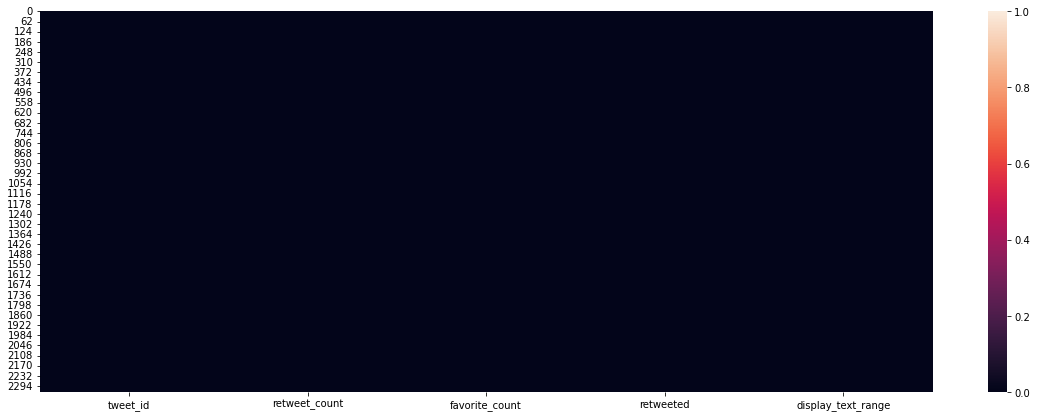

In [51]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_api.isnull(), vmin = 0, vmax = 1)

In [52]:
df_api.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
retweeted             0
display_text_range    0
dtype: int64

#### It sounds good , there are no missing data.
#### Let's look for dataset by the visual assessment:

In [53]:
df_api.sample(10)

tweet_id  retweet_count  favorite_count  retweeted display_text_range
1836  675483430902214656  923            1758            False      [0, 137]         
1780  676942428000112642  712            1985            False      [0, 76]          
404   822163064745328640  4687           0               False      [0, 140]         
2216  667915453470232577  51             197             False      [0, 138]         
1462  693109034023534592  592            1663            False      [0, 99]          
2289  666701168228331520  195            396             False      [0, 139]         
1980  672272411274932228  3124           6052            False      [0, 95]          
1213  712309440758808576  25             231             False      [0, 140]         
2227  667801013445750784  87             306             False      [0, 36]          
1294  706538006853918722  1385           3378            False      [0, 140]

I think it is good .

####  <font color='blue'>2-Let's look for the datatypes for each columns in df_api  if they are correct or not.</font> 

In [54]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   retweeted           2331 non-null   bool  
 4   display_text_range  2331 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


#### tweet_id column is int  should be a str.

####  <font color='blue'>3-Let's see if df_api has duplicated or not.</font>

In [55]:
df_api[df_api.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count, retweeted, display_text_range]
Index: []

it is good.

<a id="assessingsum"></a>

## Assessing Summary


### Quality
#### `df_twitter table`
 <font size = 3 color='blue'> 

- the datatype of the id - columns is integer and should be str
- the datatype of the timestamp - column is object and should be datetime
- some of the dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo" and contain all "None" instead
- some of the dog names are not correct (None, an, by, a, ...)
- contains retweets (duplicated rows) 
- some of the ratings are not correctly extracted (mostly if there are >1 entries with the pattern "(\d+(.\d+)?\/\d+(.\d+)?)"
- also transforming the ratings to integer created some mistakes (there are also floats)
- the source column contains html code</font>

#### `df_predict table`
<font size = 3 color='blue'>

- the datatype of the id - columns is integer and should be str
- contains retweets (duplicated rows in column jpg_url)
- there are pictures in this table that are not dogs
- the predictions are sometimes uppercase, sometimes lowercase
- also there is a "_" instead of a whitespace in the predictions</font>

#### `df_api  table`
<font size = 3 color='blue'>

- the datatype of the id - columns is integer and should be str</font>

### Tidiness

#### `df_twitter table`
- the columns doggo, floofer,pupper and puppo are not easy to analyze and should be in one column

#### `df_predict table`
- the prediction and confidence columns should be reduced to two columns - one for the prediction with the highest confidence (dog)

#### `df_api  table`
- display_text_range contains 2 variables

#### `all tables`
- All three tables share the column tweet_id and should be merged together.



<a id="cleaning"></a>
## Data Cleaning

### `Cleaning steps:`

 <font size = 4 color='purple'>
    
1- Merge the tables together

2- Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos

3- Clean the datatypes of the columns

4- Clean the wrong numerators - the floats on the one hand (replacement), the ones with multiple occurence of the pattern on the other (drop)

5- Extract the source from html code

6- Split the text range into two separate columns

7- Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column

8- Remove the wrong names of name column

9- Reduce the prediction columns into two - breed and conf

10- Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase
    
11- Storing the cleaned data</font>

#### <font size =4 color='red'>1- Merge the tables together.</font>

<font size =2 color='blue'>I could clean all the tables one by one, but all of them share some cleaning needs or are dependent on each other to do so (for example removing of retweets or pictures not containig dogs). By merging them all together as first step, I can save some coding time and avoid repetition.</font>

In [56]:
df_master = pd.merge(df_twitter, df_api, on = "tweet_id", how = "outer")
df_master = pd.merge(df_master, df_predict, on = "tweet_id", how = "outer")
df_master_clean = df_master.copy()
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### <font size =4 color='red'>2- Drop the replies, retweets and the corresponding columns and also drop the tweets without an image or with images which don't display doggos.</font>

<font size =2 color='blue'>Now that this is done, we have to remove the replies, retweets and the tweets withouth an image displaying a dog, because we only want original tweets with images. Let's visualize our missing data first</font>

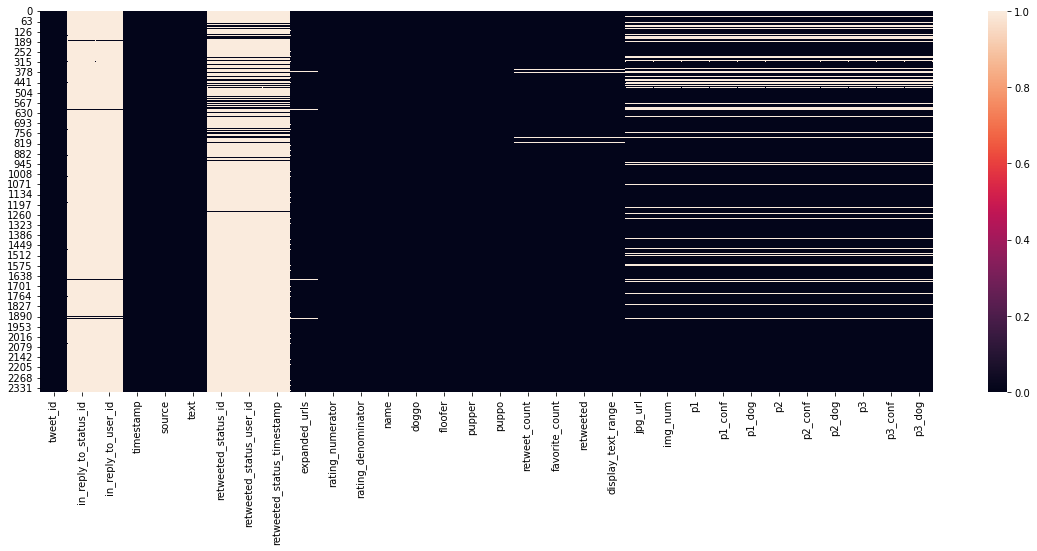

In [57]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

In [58]:
df_master_clean[df_master_clean["retweeted"].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                               source                                                                                                                                                                 text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                                                                                                                                                    expanded_urls  rating_numerator  rating_denominator     name  doggo floofer  pupper puppo  retweet_count  favorite_count retweeted display_text_range                                                                                  jpg_url  img_num                              p1   p1_conf p1_dog                              p2   p2_conf p2_dog                        p3   p3_conf p3_dog
19    888202515573088257 NaN                    NaN                   2017-07-21 01:02:36 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX                           8.874740e+17         4.196984e+09              2017-07-19 00:47:34 +0000  https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1  13                10                  Canela   None   None    None    None NaN            NaN              NaN       NaN                https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                          2.0      Pembroke                        0.809197  True   Rhodesian_ridgeback             0.054950  True   beagle                    0.038915  True 
95    873697596434513921 NaN                    NaN                   2017-06-11 00:25:14 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF                            8.688804e+17         4.196984e+09              2017-05-28 17:23:24 +0000  https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1                                                                                                                                  14                10                  Walter   None   None    None    None NaN            NaN              NaN       NaN                https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                          1.0      laptop                          0.153718  False  French_bulldog                  0.099984  True   printer                   0.077130  False
101   872668790621863937 NaN                    NaN                   2017-06-08 04:17:07 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…                         8.726576e+17         1.547674e+08              2017-06-08 03:32:35 +0000  https://twitter.com/loganamnosis/status/872657584259551233/photo/1                                                                                                                                                                                               14                10                  None     None   None    None    None NaN            NaN              NaN       NaN                NaN                                           

In [59]:
#we only want the rows without an entry in "retweeted_status_id" in our master dataframe
df_master_clean = df_master_clean[df_master_clean["retweeted_status_id"].isnull()]

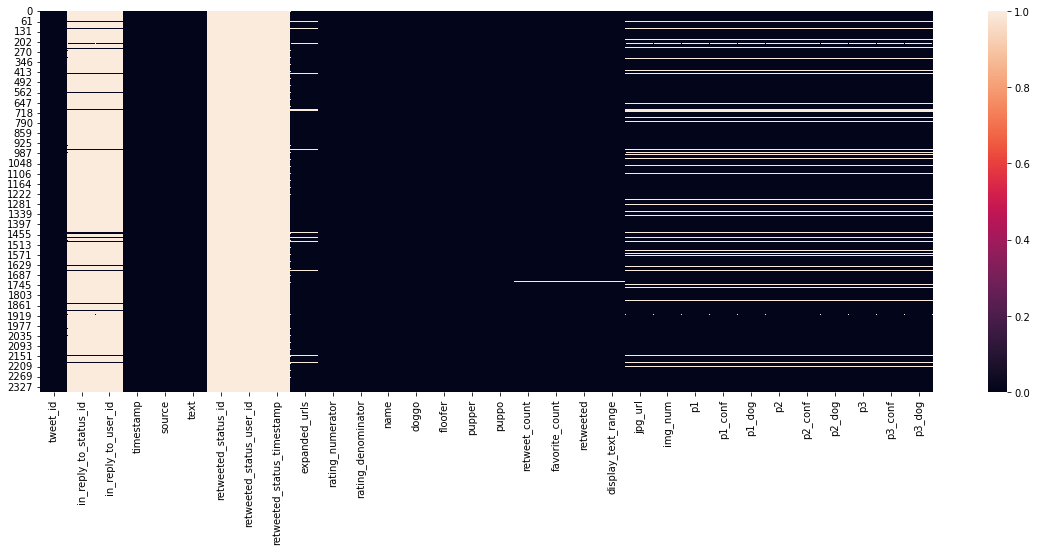

In [60]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

In [61]:
df_master_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count', 'retweeted', 'display_text_range', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object')

In [62]:
#check with the column from the api table, no retweets left
df_master_clean.retweeted.value_counts()

False    2168
Name: retweeted, dtype: int64

In [63]:
#same as for the retweets, we only want the rows without an entry in "in_reply_to_status_id"
df_master_clean = df_master_clean[df_master_clean.in_reply_to_status_id.isnull()]

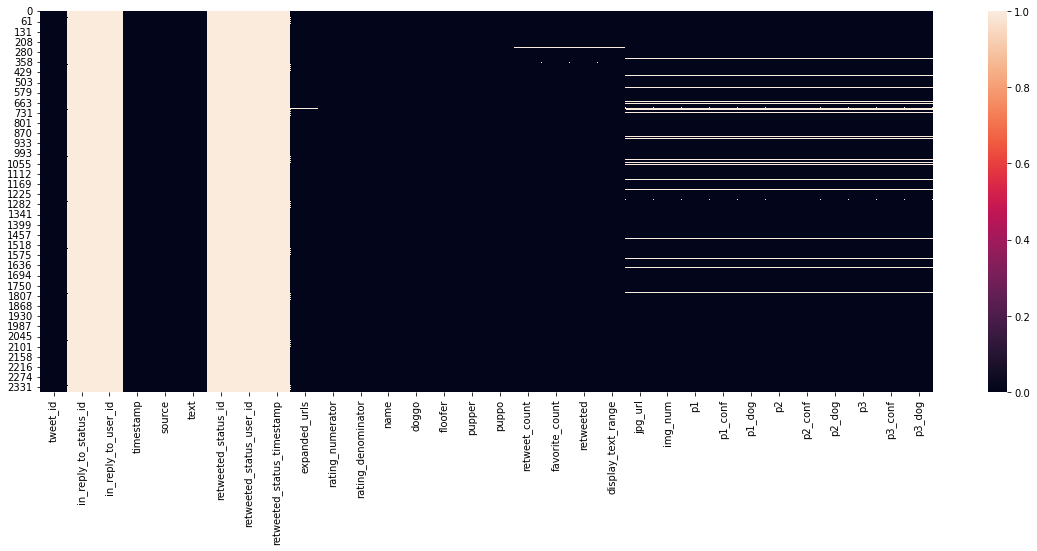

In [64]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

<font size =2 color='blue'>During the gathering process from the API there were some tweets, which got deleted by the account. We will also drop them out of our master dataframe.</font>



In [65]:
df_master_clean.dropna(subset = ["retweeted"], inplace = True)

In [66]:
#drop the unneeded columns
df_master_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp", "retweeted"], inplace=True, axis = 1)

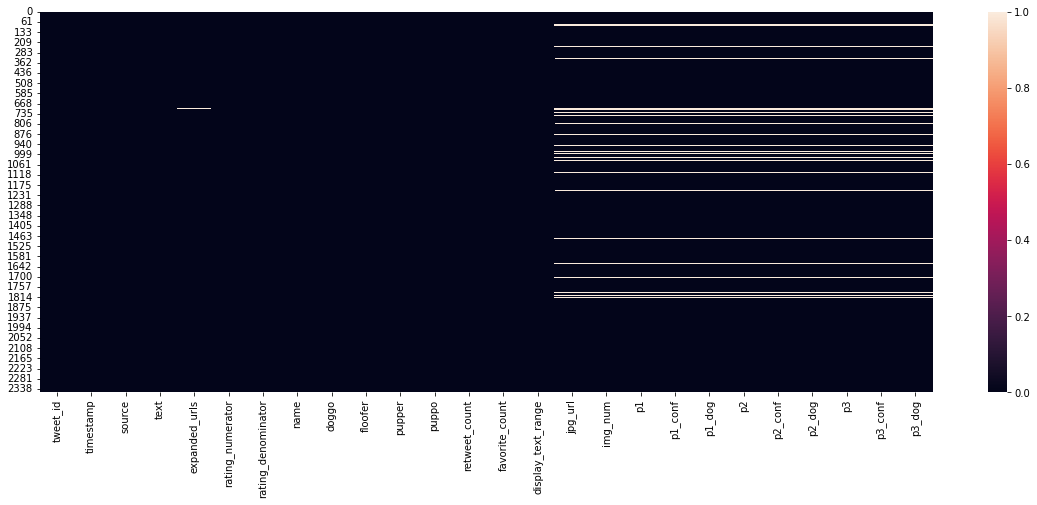

In [67]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

<font size =2 color='blue'>Now we want to take a look on the "jpg_url" column and drop all the rows, which are NAN - since these are the ones without an image. To check that, we could read in the image data from the gathered API data - but I will leave this for another time.</font>



In [68]:
df_master_clean.dropna(subset = ["jpg_url"], inplace = True)

In [69]:
#check if there are still duplicated images after dropping the replies and the retweets
sum(df_master_clean.jpg_url.duplicated())

0

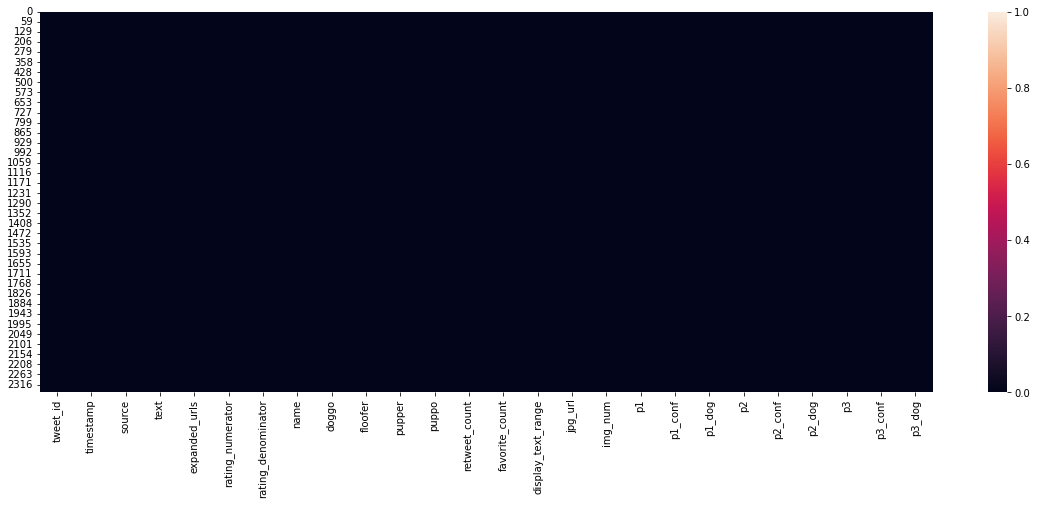

In [70]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

<font size =2 color='blue'>The last step here is to drop the rows which contain images, that are not displaying any dogs `(relying on the top three predictions of the ML algorithm).`</font>



In [71]:
df_master_clean.drop(df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

In [72]:
df_master_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, retweet_count, favorite_count, display_text_range, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

#### <font size =4 color='red'>3- Clean the datatypes of the columns.</font>

In [73]:
# Convert the tweet_id to string:
df_master_clean["tweet_id"] = df_master_clean["tweet_id"].astype("str")

In [74]:
# Convert the timestamp to datetime:
df_master_clean["timestamp"] = pd.to_datetime(df_master_clean.timestamp)

In [75]:
# Convert the retweet_count,favorite_count,img_num to integer:
for x in ["retweet_count", "favorite_count", "img_num"]:
    df_master_clean[x] = df_master_clean[x].astype("int64")

In [76]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1659 non-null   object             
 1   timestamp           1659 non-null   datetime64[ns, UTC]
 2   source              1659 non-null   object             
 3   text                1659 non-null   object             
 4   expanded_urls       1659 non-null   object             
 5   rating_numerator    1659 non-null   int64              
 6   rating_denominator  1659 non-null   int64              
 7   name                1659 non-null   object             
 8   doggo               1659 non-null   object             
 9   floofer             1659 non-null   object             
 10  pupper              1659 non-null   object             
 11  puppo               1659 non-null   object             
 12  retweet_count       1659 non-null 

#### <font size =4 color='red'>4-Clean the wrong numerators - the floats on the one hand, the ones with multiple occurence of the pattern on the other.</font>

<font size =2 color='blue'>While assessing the dataset, we found out, that floating numbers got transformed into integers, which lead to loss of information.</font>

In [77]:
df_twitter_assess.query("check_num == False")[["rating_numerator", "num","check_num"]]

rating_numerator    num  check_num
45    5                13.5   False    
340   75               9.75   False    
387   7                007    False    
695   75               9.75   False    
763   27               11.27  False    
1689  5                9.5    False    
1712  26               11.26  False

<font size =2 color='blue'>We dropped a lot of rows, so we cannot be sure that all of these problems are still in this dataset, so we will extract it again.</font>

In [78]:
pattern = "(\d+\.\d+\/\d+)"
df_master_clean.text.str.extract(pattern, expand = True)[0].dropna()

45      13.5/10 
695     9.75/10 
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [79]:
#get the right numerator out of the string
df_num_clean = df_master_clean.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]
df_num_clean

45      13.5 
695     9.75 
763     11.27
1712    11.26
Name: 0, dtype: object

In [80]:
#get the index of the wrong data
df_num_clean_index = df_num_clean.index
df_num_clean_values = df_num_clean.values.astype("float64")

<font size=2 color='blue'>Now that we have our data together, we can impute these values and clean this data.</font>

In [81]:
#Convert the datatypes to float
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype("float64")
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype("float64")
#Impute the data
df_master_clean.loc[df_num_clean_index, "rating_numerator"] = df_num_clean_values
df_master_clean.loc[df_num_clean_index].rating_numerator

45      13.50
695     9.75 
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

<font size=2 color='blue'>We also have the problem, that there can be multiple occurrences of the pattern. The reason for this is - most of the time - the display of two or more dogs in an image. For this cases we could add the ratings up, because the author of the Twitter account did this in one case that we found. Or we could build the average rating per each picture. For now, we are going to drop them out of the dataframe.</font>

In [82]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

#get the index of the rows which contains the pattern more than once
pattern_clean_index = df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1].index

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [83]:
df_master_clean.drop(pattern_clean_index, inplace = True)

In [84]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 1 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1633 non-null   object             
 1   timestamp           1633 non-null   datetime64[ns, UTC]
 2   source              1633 non-null   object             
 3   text                1633 non-null   object             
 4   expanded_urls       1633 non-null   object             
 5   rating_numerator    1633 non-null   float64            
 6   rating_denominator  1633 non-null   float64            
 7   name                1633 non-null   object             
 8   doggo               1633 non-null   object             
 9   floofer             1633 non-null   object             
 10  pupper              1633 non-null   object             
 11  puppo               1633 non-null   object             
 12  retweet_count       1633 non-null 

In [85]:
#no more occurrences of the mentioned problem are left
print(df_master_clean.text.str.count(pattern)[df_master_clean.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


### <font color='red' size=4>5- Extract the source from html code.</font>

<font color='blue' size=2> Right now the source column is not giving us any useful information while looking at it. Because the relevant information is always between two '> <' , the information will be easy to extract.</font>

In [86]:
df_master_clean.head(2)

tweet_id                 timestamp                                                                              source                                                                                                                                                                text                                                    expanded_urls  rating_numerator  rating_denominator    name doggo floofer pupper puppo  retweet_count  favorite_count display_text_range                                          jpg_url  img_num         p1   p1_conf p1_dog        p2   p2_conf p2_dog        p3   p3_conf p3_dog
1  892177421306343426 2017-08-01 00:17:27+00:00  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV  https://twitter.com/dog_rates/status/892177421306343426/photo/1  13.0              10.0                Tilly   None  None    None   None  5549           30639           [0, 138]           https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1        Chihuahua  0.323581  True   Pekinese  0.090647  True   papillon  0.068957  True 
2  891815181378084864 2017-07-31 00:18:03+00:00  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                   https://twitter.com/dog_rates/status/891815181378084864/photo/1  12.0              10.0                Archie  None  None    None   None  3671           23036           [0, 121]           https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1        Chihuahua  0.716012  True   malamute  0.078253  True   kelpie    0.031379  True

In [87]:
df_master_clean.source = df_master_clean.source.str.extract("\>(.*?)\<", expand = True)
df_master_clean.iloc[:,:3].head(2)

tweet_id                 timestamp              source
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone

In [88]:
df_master_clean.source.value_counts()

Twitter for iPhone    1605
Twitter Web Client    20  
TweetDeck             8   
Name: source, dtype: int64

#### <font size=4 color='red'>6-Split the text range into two separate columns</font>

In [89]:
df_master_clean[["display_text_range"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 1 to 2355
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   display_text_range  1633 non-null   object
dtypes: object(1)
memory usage: 25.5+ KB


In [90]:
df_master_clean.display_text_range[1]

[0, 138]

<font size=2 color='blue'>Since the display_text_range column is interpreted as list, we can simply split it by using list indexing.</font>

In [91]:
#Get the lower text range at list index 0
df_master_clean["lower_text_range"] = df_master_clean["display_text_range"].apply(lambda x: x[0])

#Get the lower text range at list index 1
df_master_clean["upper_text_range"] = df_master_clean["display_text_range"].apply(lambda x: x[1])

df_master_clean.drop("display_text_range", axis = 1, inplace = True)

In [92]:
df_master_clean[["lower_text_range", "upper_text_range"]].head()

lower_text_range  upper_text_range
1  0                 138             
2  0                 121             
3  0                 79              
4  0                 138             
5  0                 138

### <font size = 4 color ='red'>7- Remove the "None" out of the doggo, floofer, pupper and puppo column and merge them into one column</font>

<font size = 2 color ='blue'>We want to reduce the columns into one for an easier analysis. For that we have to remove the None with "" at first to concat the columns together and afterswards with np.nan, so we could easily exclude these rows from a specific analysis.</font>

In [93]:
#replace "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_master_clean[x].replace("None", "", inplace = True)

#concat the columns together
df_master_clean['dog_class'] = df_master_clean['doggo'].map(str) + df_master_clean[
    'floofer'].map(str) + df_master_clean['pupper'].map(str) + df_master_clean['puppo'].map(str)

df_master_clean.dog_class.value_counts()

                1379
pupper          164 
doggo           53  
puppo           21  
doggopupper     7   
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: dog_class, dtype: int64

In [94]:
#replace the leftover "" with np.nan
df_master_clean["dog_class"].replace("", np.nan, inplace = True)
df_master_clean.dog_class.value_counts() 

pupper          164
doggo           53 
puppo           21 
doggopupper     7  
floofer         7  
doggopuppo      1  
doggofloofer    1  
Name: dog_class, dtype: int64

In [95]:
#count the occurrences of the pattern and show the rows with count > 1
df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
575     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

<font size=2 color='blue'>As we can see there are cases, in which there were multiple classifications. Let's extract the classes from the text and see where the differences occur.</font>



In [96]:
df_master_clean["dog_class_re"] = df_master_clean.text.str.extract(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

In [97]:
#find the differences of the extract
df_master_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

text     dog_class dog_class_re
191   Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel        doggopuppo    puppo      
200   At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk  doggofloofer  doggo      
531   Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                      doggopupper   pupper     
575   This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                      doggopupper   doggo      
889   Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll                      doggopupper   doggo      
956   Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8                              doggopupper   doggo      
1063  This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC                                                                           doggopupper   pupper     
1113  Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                                                                            doggopupper   doggo

<font size=2 color='blue'>The difference occurs in 8 cases. We can read through the text and extract the correct dog_class. Afterwards we can impute the correct classes into the column - for cases, in which there are multiple dogs in it, we will impute np.nan for consistency.</font>

In [98]:
#191 puppo
#200 floofer
#531 two dogs
#575 pupper
#889 two dogs
#956 not classified by author
#1063 two dogs
#1113 two dogs

df_master_clean.loc[191, "dog_class"] = "puppo"
df_master_clean.loc[200, "dog_class"] = "floofer"
df_master_clean.loc[531, "dog_class"] = np.nan
df_master_clean.loc[575, "dog_class"] = "pupper"
df_master_clean.loc[889, "dog_class"] = np.nan
df_master_clean.loc[956, "dog_class"] = np.nan
df_master_clean.loc[1063, "dog_class"] = np.nan
df_master_clean.loc[1113, "dog_class"] = np.nan

In [99]:
#find the differences of the extract - worked
df_master_clean[["text","dog_class", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_class != dog_class_re")

text dog_class dog_class_re
200   At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk  floofer   doggo      
531   Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                      NaN       pupper     
575   This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                      pupper    doggo      
889   Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll                      NaN       doggo      
956   Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8                              NaN       doggo      
1063  This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC                                                                           NaN       pupper     
1113  Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                                                                            NaN       doggo

In [100]:
#drop the columns out
df_master_clean.drop(["doggo", "floofer", "pupper", "puppo", "dog_class_re"], inplace = True, axis = 1)

<font size=2 color='blue'>Similar to the multiple occurence of a pattern for the numerator, we should do the same check here.</font>

In [101]:
#count the occurrences of the pattern and show the rows with count > 1
df_master_clean[["text", "dog_class"]].loc[
    df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
        df_master_clean.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1].index]

text dog_class
191   Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel  puppo   
531   Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                NaN     
575   This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                pupper  
889   Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll                NaN     
956   Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8                        NaN     
1063  This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC                                                                     NaN     
1113  Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda                                                                                      NaN     
1304  "I shall trip the big pupper with leash. Big pupper will never see it coming. I am a genius." Both 11/10 https://t.co/uQsCJ8pf51                                pupper  
1340  Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu                                              pupper  
1367  This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s                            pupper  
1653  "Hello forest pupper I am house pupper welcome to my abode" (8/10 for both) https://t.co/qFD8217fUT                                                             pupper  
1788  Reckless pupper here. Not even looking at road. Absolute menace. No regard for fellow pupper lives. 10/10 still cute https://t.co/96IBkOYB7j                    pupper  
1828  All this pupper wanted to do was go skiing. No one told him about the El Niño. Poor pupper. 10/10 maybe next year https://t.co/fTgbq1UBR9                       pupper  
1907  This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f                      pupper

### <font size=4 color= 'red'>8- Remove the wrong names of name column</font>


<font size=2 color= 'blue'>Here we will also replace the wrong names with np.nan.</font>

In [102]:
name_replace =list(df_master_clean['name'][df_master_clean['name'].str.match('[a-z]+')])
# add 'None' in name_replace:
name_replace =name_replace+['None']
for x in name_replace:
    df_master_clean["name"].replace(x, np.nan, inplace = True)

In [103]:
df_master_clean.name.value_counts()

Cooper            10
Tucker            9 
Charlie           9 
Oliver            9 
Lucy              9 
Penny             8 
Daisy             7 
Winston           7 
Sadie             7 
Lola              6 
Jax               6 
Toby              6 
Koda              6 
Bo                5 
Rusty             5 
Leo               5 
Oscar             5 
Stanley           5 
Bella             5 
Louis             4 
Bailey            4 
Gus               4 
Sophie            4 
Maggie            4 
Chester           4 
Bear              4 
Finn              4 
Bentley           4 
Jack              4 
George            4 
Winnie            4 
Scooter           4 
Scout             4 
Duke              4 
Cassie            4 
Dave              4 
Alfie             4 
Larry             4 
Brody             4 
Oakley            4 
Dexter            4 
Milo              4 
Wyatt             3 
Rosie             3 
Ellie             3 
Walter            3 
Sebastian         3 
Wallace      

In [104]:
df_master_clean.head()

tweet_id                 timestamp              source                                                                                                                                                                text                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name  retweet_count  favorite_count                                          jpg_url  img_num                        p1   p1_conf p1_dog                  p2   p2_conf p2_dog                           p3   p3_conf p3_dog  lower_text_range  upper_text_range dog_class
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                  13.0              10.0                Tilly     5549           30639           https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1        Chihuahua                 0.323581  True   Pekinese            0.090647  True   papillon                     0.068957  True   0                 138               NaN     
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                   https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                  12.0              10.0                Archie    3671           23036           https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1        Chihuahua                 0.716012  True   malamute            0.078253  True   kelpie                       0.031379  True   0                 121               NaN     
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                             https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                  13.0              10.0                Darla     7650           38693           https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1        paper_towel               0.170278  False  Labrador_retriever  0.168086  True   spatula                      0.040836  False  0                 79                NaN     
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1  12.0              10.0                Franklin  8249           36967           https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2        basset                    0.555712  True   English_springer    0.225770  True   German_short-haired_pointer  0.175219  True   0                 138               NaN     
5  891087950875897856 2017-07-29 00:08:17+00:00  Twitter for iPhone  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh  https://twitter.com/dog_rates/status/891087950875897856/photo/1                                                                  13.0              10.0                NaN       2759           18631           https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  1        Chesapeake_Bay_retriever  0.425595  True   Irish_terrier       0.116317  True   Indian_elephant              0.076902  False  0                 138               Na

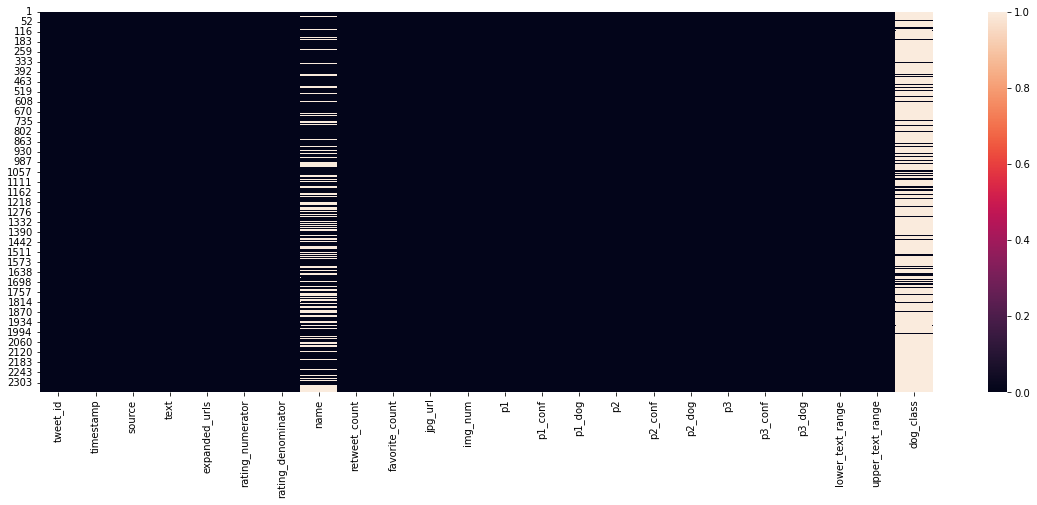

In [105]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_clean.isnull(), vmin = 0, vmax = 1)

In [106]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 1 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1633 non-null   object             
 1   timestamp           1633 non-null   datetime64[ns, UTC]
 2   source              1633 non-null   object             
 3   text                1633 non-null   object             
 4   expanded_urls       1633 non-null   object             
 5   rating_numerator    1633 non-null   float64            
 6   rating_denominator  1633 non-null   float64            
 7   name                1164 non-null   object             
 8   retweet_count       1633 non-null   int64              
 9   favorite_count      1633 non-null   int64              
 10  jpg_url             1633 non-null   object             
 11  img_num             1633 non-null   int64              
 12  p1                  1633 non-null 

### <font size=4 color ='red'>9- Reduce the prediction columns into two - breed and conf</font>



<font size=2 color ='blue'>In the next step we want to reduce the prediction columns into two - breed and confidence. The columns are already sorted by confidence. We will take the most likely prediction for each row which is supposed to be a dog.</font>

In [107]:
df_master_clean.query("p2_conf > p1_conf")

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, lower_text_range, upper_text_range, dog_class]
Index: []

In [108]:
df_master_clean.query("p3_conf > p1_conf")

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, lower_text_range, upper_text_range, dog_class]
Index: []

In [109]:
df_master_clean.query("p3_conf > p2_conf")


Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, retweet_count, favorite_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, lower_text_range, upper_text_range, dog_class]
Index: []

In [110]:
#extract the most likely prediction which is a dog
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_master_clean["breed"] = df_master_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_master_clean["conf"] = df_master_clean[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [112]:
df_master_clean.iloc[:, 12:]


p1   p1_conf p1_dog                              p2   p2_conf p2_dog                              p3       p3_conf p3_dog  lower_text_range  upper_text_range    dog_class                           breed      conf
1     Chihuahua                       0.323581  True   Pekinese                        0.090647  True   papillon                        6.895690e-02  True   0                 138               NaN          Chihuahua                       0.323581
2     Chihuahua                       0.716012  True   malamute                        0.078253  True   kelpie                          3.137890e-02  True   0                 121               NaN          Chihuahua                       0.716012
3     paper_towel                     0.170278  False  Labrador_retriever              0.168086  True   spatula                         4.083590e-02  False  0                 79                NaN          Labrador_retriever              0.168086
4     basset                          0.555712  True   English_springer                0.225770  True   German_short-haired_pointer     1.752190e-01  True   0                 138               NaN          basset                          0.555712
5     Chesapeake_Bay_retriever        0.425595  True   Irish_terrier                   0.116317  True   Indian_elephant                 7.690220e-02  False  0                 138               NaN          Chesapeake_Bay_retriever        0.425595
6     Appenzeller                     0.341703  True   Border_collie                   0.199287  True   ice_lolly                       1.935480e-01  False  0                 140               NaN          Appenzeller                     0.341703
7     Pomeranian                      0.566142  True   Eskimo_dog                      0.178406  True   Pembroke                        7.650690e-02  True   0                 118               NaN          Pomeranian                      0.566142
8     Irish_terrier                   0.487574  True   Irish_setter                    0.193054  True   Chesapeake_Bay_retriever        1.181840e-01  True   0                 122               NaN          Irish_terrier                   0.487574
9     Pembroke                        0.511319  True   Cardigan                        0.451038  True   Chihuahua                       2.924820e-02  True   0                 133               doggo        Pembroke                        0.511319
10    Samoyed                         0.957979  True   Pomeranian                      0.013884  True   chow                            8.167480e-03  True   0                 130               NaN          Samoyed                         0.957979
11    French_bulldog                  0.377417  True   Labrador_retriever              0.151317  True   muzzle                          8.298110e-02  False  0                 107               NaN          French_bulldog                  0.377417
12    Pembroke                        0.966327  True   Cardigan                        0.027356  True   basenji                         4.633230e-03  True   0                 106               puppo        Pembroke                        0.966327
13    French_bulldog                  0.991650  True   boxer                           0.002129  True   Staffordshire_bullterrier       1.498180e-03  True   0                 91                NaN          French_bulldog                  0.991650
14    golden_retriever                0.953442  True   Labrador_retriever              0.013834  True   redbone                         7.957750e-03  True   0                 118               puppo        golden_retriever                0.953442
15    whippet                         0.626152  True   borzoi                          0.194742  True   Saluki                          2.735070e-02  True   0                 138               NaN          whippet                         0.626152
16    golden_retriever                0.714719  True   Tibetan_mastiff            

In [113]:
#drop the reduced columns
df_master_clean.drop(df_master_clean.columns[12:21], inplace = True, axis = 1)

In [114]:
df_master_clean.head()

tweet_id                 timestamp              source                                                                                                                                                                text                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name  retweet_count  favorite_count                                          jpg_url  img_num  lower_text_range  upper_text_range dog_class                     breed      conf
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                  13.0              10.0                Tilly     5549           30639           https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1        0                 138               NaN       Chihuahua                 0.323581
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                   https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                  12.0              10.0                Archie    3671           23036           https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1        0                 121               NaN       Chihuahua                 0.716012
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                             https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                  13.0              10.0                Darla     7650           38693           https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1        0                 79                NaN       Labrador_retriever        0.168086
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1  12.0              10.0                Franklin  8249           36967           https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2        0                 138               NaN       basset                    0.555712
5  891087950875897856 2017-07-29 00:08:17+00:00  Twitter for iPhone  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh  https://twitter.com/dog_rates/status/891087950875897856/photo/1                                                                  13.0              10.0                NaN       2759           18631           https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  1        0                 138               NaN       Chesapeake_Bay_retriever  0.425595

### <font size=4 color='red'>10- Clean the new breed column by replacing the "_" with a whitespace and make them all lowercase</font>



<font size=2 color='blue'>Now that we have our reduced column, we have to clean it for consistency.</font>



In [115]:
#replace "_" with " "
df_master_clean.breed = df_master_clean.breed.str.replace("_", " ")

In [116]:
df_master_clean.breed

1       Chihuahua                     
2       Chihuahua                     
3       Labrador retriever            
4       basset                        
5       Chesapeake Bay retriever      
6       Appenzeller                   
7       Pomeranian                    
8       Irish terrier                 
9       Pembroke                      
10      Samoyed                       
11      French bulldog                
12      Pembroke                      
13      French bulldog                
14      golden retriever              
15      whippet                       
16      golden retriever              
17      golden retriever              
18      Siberian husky                
20      French bulldog                
21      basset                        
23      Pembroke                      
24      Mexican hairless              
25      Samoyed                       
26      Chihuahua                     
27      kuvasz                        
29      French bulldog   

In [117]:
df_master_clean.breed = df_master_clean.breed.str.lower()

In [118]:
df_master_clean.breed.value_counts().head(10)

golden retriever      154
labrador retriever    103
pembroke              93 
chihuahua             87 
pug                   62 
toy poodle            49 
chow                  48 
samoyed               41 
pomeranian            39 
malamute              33 
Name: breed, dtype: int64

In [119]:
#reset index to match with the real amount of rows
df_master_clean.reset_index(drop = True, inplace = True)

In [120]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1633 non-null   object             
 1   timestamp           1633 non-null   datetime64[ns, UTC]
 2   source              1633 non-null   object             
 3   text                1633 non-null   object             
 4   expanded_urls       1633 non-null   object             
 5   rating_numerator    1633 non-null   float64            
 6   rating_denominator  1633 non-null   float64            
 7   name                1164 non-null   object             
 8   retweet_count       1633 non-null   int64              
 9   favorite_count      1633 non-null   int64              
 10  jpg_url             1633 non-null   object             
 11  img_num             1633 non-null   int64              
 12  lower_text_range    1633 non-null 

In [121]:
df_master_clean[["breed", "conf"]].head(3)

breed      conf
0  chihuahua           0.323581
1  chihuahua           0.716012
2  labrador retriever  0.168086

### <font size=4 color='red'>11- Storing the cleaned data</font>

In [122]:
#Storing the data to a *.csv file
df_master_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/WeRateDogs™Twitter profile/wrangle_act_project/twitter_archive_master.csv', index = False)

<a id="analysis"></a>

## Data Analysis based on wrangled data

In [123]:
#reading "twitter_archive_master.csv" which it has already wrangled above:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WeRateDogs™Twitter profile/wrangle_act_project/twitter_archive_master.csv")

In [124]:
df.head()

tweet_id                  timestamp              source                                                                                                                                                                text                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name  retweet_count  favorite_count                                          jpg_url  img_num  lower_text_range  upper_text_range dog_class                     breed      conf
0  892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV  https://twitter.com/dog_rates/status/892177421306343426/photo/1                                                                  13.0              10.0                Tilly     5549           30639           https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  1        0                 138               NaN       chihuahua                 0.323581
1  891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone  This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                   https://twitter.com/dog_rates/status/891815181378084864/photo/1                                                                  12.0              10.0                Archie    3671           23036           https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  1        0                 121               NaN       chihuahua                 0.716012
2  891689557279858688  2017-07-30 15:58:51+00:00  Twitter for iPhone  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                             https://twitter.com/dog_rates/status/891689557279858688/photo/1                                                                  13.0              10.0                Darla     7650           38693           https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  1        0                 79                NaN       labrador retriever        0.168086
3  891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1  12.0              10.0                Franklin  8249           36967           https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg  2        0                 138               NaN       basset                    0.555712
4  891087950875897856  2017-07-29 00:08:17+00:00  Twitter for iPhone  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh  https://twitter.com/dog_rates/status/891087950875897856/photo/1                                                                  13.0              10.0                NaN       2759           18631           https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  1        0                 138               NaN       chesapeake bay retriever  0.425595

In [125]:
df.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  favorite_count      img_num  lower_text_range  upper_text_range         conf
count  1.633000e+03  1633.000000       1633.000000         1633.000000    1633.000000     1633.000000  1633.0            1633.000000       1633.000000
mean   7.400183e+17  11.348304         10.451317           2454.908145    8507.151255     1.214942     0.0               110.394366        0.550401   
std    6.809926e+16  7.301325          6.324380            4449.209799    12454.738122    0.576052     0.0               26.226087         0.299217   
min    6.660209e+17  0.000000          7.000000            11.000000      69.000000       1.000000     0.0               32.000000         0.000010   
25%    6.776984e+17  10.000000         10.000000           560.000000     1976.000000     1.000000     0.0               93.000000         0.304175   
50%    7.149823e+17  11.000000         10.000000           1230.000000    4005.000000     1.000000     0.0               115.000000        0.550702   
75%    7.932563e+17  12.000000         10.000000           2776.000000    10531.000000    1.000000     0.0               136.000000        0.822048   
max    8.921774e+17  165.000000        150.000000          75495.000000   152564.000000   4.000000     0.0               148.000000        0.999956

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1633 non-null   int64  
 1   timestamp           1633 non-null   object 
 2   source              1633 non-null   object 
 3   text                1633 non-null   object 
 4   expanded_urls       1633 non-null   object 
 5   rating_numerator    1633 non-null   float64
 6   rating_denominator  1633 non-null   float64
 7   name                1164 non-null   object 
 8   retweet_count       1633 non-null   int64  
 9   favorite_count      1633 non-null   int64  
 10  jpg_url             1633 non-null   object 
 11  img_num             1633 non-null   int64  
 12  lower_text_range    1633 non-null   int64  
 13  upper_text_range    1633 non-null   int64  
 14  dog_class           249 non-null    object 
 15  breed               1633 non-null   object 
 16  conf  

***Because we use the data to make analysis, we should change the datatype of some columns:*** 

In [127]:
# Convert the timestamp to datetime:
df["timestamp"] = pd.to_datetime(df.timestamp)
# Convert the retweet_count,favorite_count,img_num to integer:
for x in ["retweet_count", "favorite_count", "img_num"]:
    df[x] = df[x].astype("int64")

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1633 non-null   int64              
 1   timestamp           1633 non-null   datetime64[ns, UTC]
 2   source              1633 non-null   object             
 3   text                1633 non-null   object             
 4   expanded_urls       1633 non-null   object             
 5   rating_numerator    1633 non-null   float64            
 6   rating_denominator  1633 non-null   float64            
 7   name                1164 non-null   object             
 8   retweet_count       1633 non-null   int64              
 9   favorite_count      1633 non-null   int64              
 10  jpg_url             1633 non-null   object             
 11  img_num             1633 non-null   int64              
 12  lower_text_range    1633 non-null 

### Exploring with Visuals

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


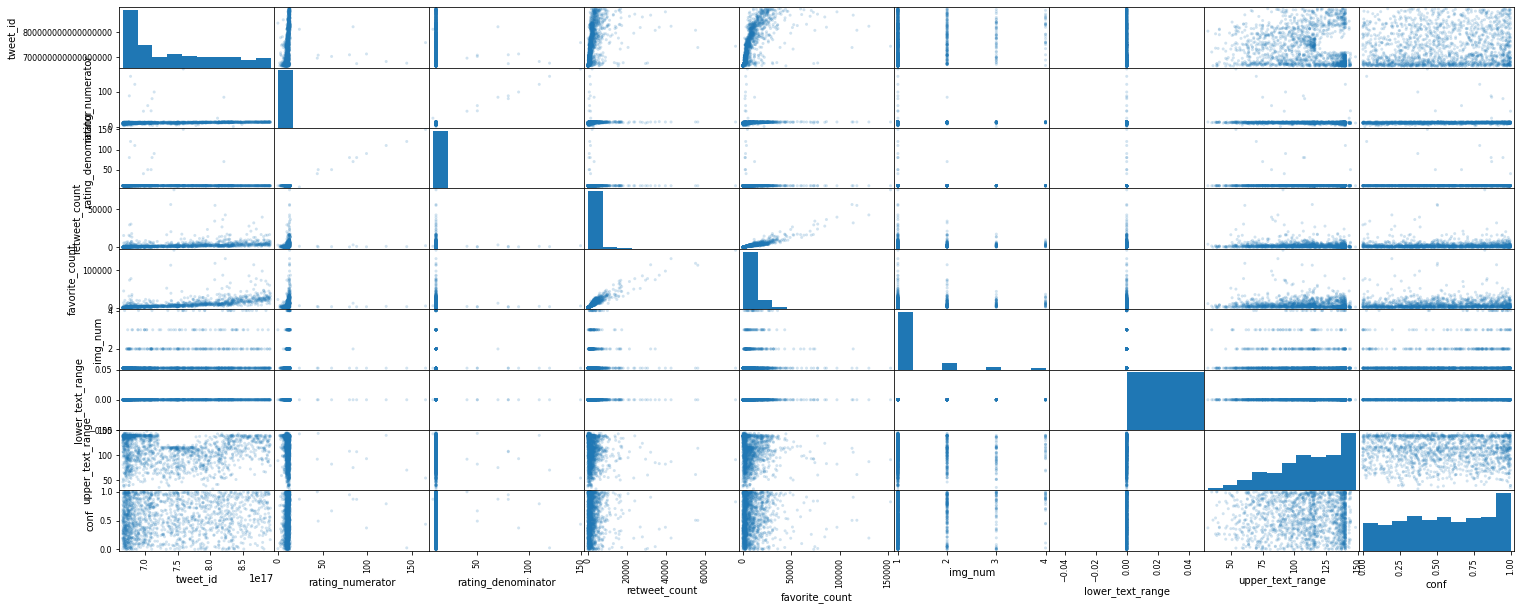

In [129]:
pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(25,10));

### Exploratory Data Analysis
<font size=4 color =#cd20000> Now we will try answer the following questions:
<ul>
    
<font size=4 color =#660066>

1- What is the most device used  for Twitter in WeRateDogs™ ?

2- What is the most popular dog in WeRateDogs™ ?

3- Based on predicted the most likely dog breed, Which breed gets retweeted and favorited the most overall in WeRateDogs™ ?

4- Where dose the trend of tweets posted go over time in WeRateDogs™ ?
</font>

#### <font size=4 color =#234790> Question No. 1 What is the most device used  for Twitter in WeRateDogs™ ?</font>


In [130]:
df.source.value_counts()

Twitter for iPhone    1605
Twitter Web Client    20  
TweetDeck             8   
Name: source, dtype: int64

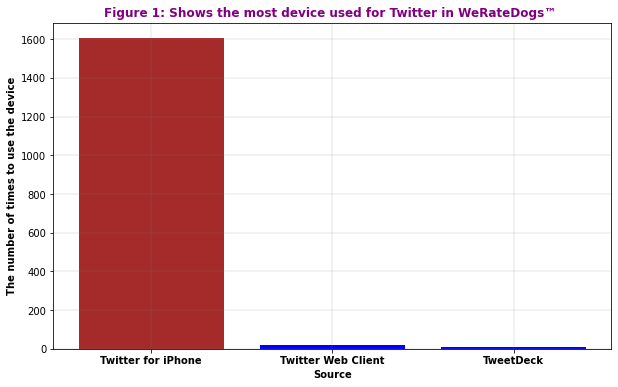

In [131]:
heights = df.source.value_counts()
labels =  df.source.value_counts().index
locations = list(range(1,df.source.value_counts().shape[0]+1))
clrs = ['blue' if (x < max(df.source.value_counts())) else 'brown' for x in df.source.value_counts()]
plt.figure(figsize=[10,6])
plt.grid(True,color='grey', linewidth=0.2)
plt.bar( locations,heights, tick_label=labels,color=clrs)
plt.xlabel('Source', fontweight='bold')
plt.ylabel('The number of times to use the device', fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.title('Figure 1: Shows the most device used for Twitter in WeRateDogs™ ', fontweight='bold',color='purple');

In [132]:
# the percentage of the device which is the most used :
max(df.source.value_counts())/((df.source.value_counts().iloc[0])+(df.source.value_counts().iloc[1])+(df.source.value_counts().iloc[2]))

0.9828536436007348


**This plot shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDeck and Twitter Web Client rare (less than 1%).** 

#### <font size=4 color =#234790> Question No. 2 What is the most popular dog in WeRateDogs™ ?</font>


In [133]:
df.dog_class.value_counts()

pupper         165
doggo          53 
puppo          22 
floofer        8  
doggopupper    1  
Name: dog_class, dtype: int64

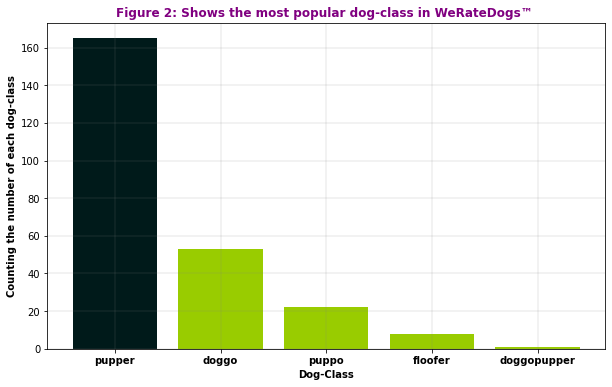

In [134]:
heights = df.dog_class.value_counts()
labels =  df.dog_class.value_counts().index
locations = list(range(1,df.dog_class.value_counts().shape[0]+1))
clrs = ['#99cc00' if (x < max(df.dog_class.value_counts())) else '#001a1a' for x in df.dog_class.value_counts()]
plt.figure(figsize=[10,6])
plt.grid(True,color='grey', linewidth=0.2)
plt.bar( locations,heights, tick_label=labels,color=clrs)
plt.xlabel('Dog-Class', fontweight='bold')
plt.ylabel('Counting the number of each dog-class', fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.title('Figure 2: Shows the most popular dog-class in WeRateDogs™ ', fontweight='bold',color='purple');

**Figure2 shows dog-class that ‘pupper’ (a small doggo, usually younger) is the most popular dog-class, followed by ‘doggo’, ‘puppo’ , 'floofer' and 'doggopupper'. It could be due to the young and unmatured dog is usually cuter than the adult dog.**

#### <font size=4 color =#234790> Question No.3 Based on predicted the most likely dog breed, Which breed gets retweeted and favorited the most overall in WeRateDogs™ ?</font>


 ## <font size=3 color ='045D24'> To answer this question we will try:
<ul>
 <font size=3 color ='013A14'>
A- look on the frequency of the breed occurence in WeRateDogs™ 
        
B- create a groupby object to sum up the favorite and retweet count of each breedin WeRateDogs™</font>

## <font size=2 color = '3A0101'>A- Let's look on the frequency of the breed occurence in WeRateDogs™</font>

In [135]:
df.breed.value_counts()

golden retriever                  154
labrador retriever                103
pembroke                          93 
chihuahua                         87 
pug                               62 
toy poodle                        49 
chow                              48 
samoyed                           41 
pomeranian                        39 
malamute                          33 
french bulldog                    30 
chesapeake bay retriever          29 
cocker spaniel                    29 
miniature pinscher                24 
eskimo dog                        22 
german shepherd                   21 
cardigan                          21 
shih-tzu                          20 
beagle                            20 
siberian husky                    19 
staffordshire bullterrier         19 
shetland sheepdog                 18 
rottweiler                        18 
maltese dog                       18 
kuvasz                            17 
basset                            17 
italian grey

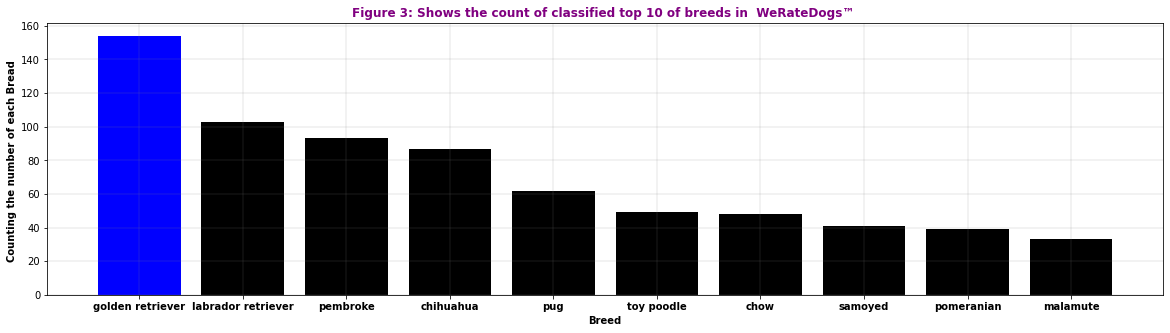

In [136]:
heights = df.breed.value_counts().iloc[:10]
labels =  df.breed.value_counts().iloc[:10].index
locations = list(range(1,df.breed.value_counts().iloc[:10].shape[0]+1))
clrs = ['Black' if (x < max(df.breed.value_counts().iloc[:10])) else 'blue' for x in df.breed.value_counts().iloc[:10]]
plt.figure(figsize=[20,5])
plt.grid(True,color='grey', linewidth=0.2)
plt.bar( locations,heights, tick_label=labels,color=clrs)
plt.xlabel('Breed', fontweight='bold')
plt.ylabel('Counting the number of each Bread ', fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.title('Figure 3: Shows the count of classified top 10 of breeds in  WeRateDogs™ ', fontweight='bold',color='purple');

**The dogs displayed in the images are mostly golden retrievers.**

## <font size=2 color = '3A0101'>B- Let's create a groupby object to sum up the favorite and retweet count of each breed in WeRateDogs™</font>

In [152]:
df_breed_group = df[["retweet_count", "favorite_count", "breed"]].groupby("breed", as_index = False).sum()

In [153]:
df_breed_group.sort_values("retweet_count", ascending = False).head(5)

breed  retweet_count  favorite_count
45  golden retriever    490544         1726525       
62  labrador retriever  336954         1096463       
80  pembroke            250758         946930        
27  chihuahua           206361         662703        
88  samoyed             165441         505136

In [154]:
df_breed_group.sort_values("favorite_count", ascending = False).head(5)

breed  retweet_count  favorite_count
45  golden retriever    490544         1726525       
62  labrador retriever  336954         1096463       
80  pembroke            250758         946930        
27  chihuahua           206361         662703        
41  french bulldog      140354         551066

**The golden retriever and the labrador retriever therefore also lead the list of most favorite and retweets.**



In [155]:
df_breed_group["sum"] = df_breed_group["retweet_count"] + df_breed_group["favorite_count"]

In [156]:
df_breed_group.sort_values("sum", ascending = False)

breed  retweet_count  favorite_count      sum
45   golden retriever                490544         1726525         2217069
62   labrador retriever              336954         1096463         1433417
80   pembroke                        250758         946930          1197688
27   chihuahua                       206361         662703          869064 
41   french bulldog                  140354         551066          691420 
88   samoyed                         165441         505136          670577 
28   chow                            113945         408897          522842 
30   cocker spaniel                  123340         359153          482493 
82   pug                             100502         341976          442478 
66   malamute                        93953          319806          413759 
81   pomeranian                      96636          287162          383798 
103  toy poodle                      94811          288497          383308 
26   chesapeake bay retriever        70610          275624          346234 
39   eskimo dog                      90699          255506          346205 
25   cardigan                        67821          240848          308669 
63   lakeland terrier                62946          192320          255266 
42   german shepherd                 47759          194298          242057 
70   miniature pinscher              47740          177484          225224 
48   great pyrenees                  57502          165738          223240 
6    basset                          42202          179736          221938 
110  whippet                         48013          145371          193384 
98   standard poodle                 52183          137750          189933 
8    bedlington terrier              42707          135756          178463 
92   shetland sheepdog               36630          137703          174333 
37   english springer                46631          127159          173790 
97   staffordshire bullterrier       31331          135522          166853 
85   rottweiler                      35583          124784          160367 
56   italian greyhound               31851          126872          158723 
94   siberian husky                  28960          122874          151834 
40   flat-coated retriever           30982          119985          150967 
59   kelpie                          28441          119439          147880 
75   norwegian elkhound              33218          110697          143915 
2    american staffordshire terrier  26362          113204          139566 
89   schipperke                      29753          98121           127874 
77   old english sheepdog            29072          93897           122969 
14   border collie                   22409          94504           116913 
69   mexican hairless                25469          85211           110680 
79   pekinese                        24096          86017           110113 
19   boxer                           24357          85377           109734 
105  vizsla                          22082          87039           109121 
109  west highland white terrier     20191          87120           107311 
15   border terrier                  20313          85469           105782 
87   saluki                          17548          87062           104610 
11   blenheim spaniel                21479          81390           102869 
7    beagle                          23024          78292           101316 
61   kuvasz                          21016          79323           100339 
93   shih-tzu                        24401          63857           88258  
9    bernese mountain dog            15173          71919           87092  
31   collie                          18956          63319           82275  
12   bloodhound                      14270          67142           81412  
47   great dane                      16178          58573           74751  
35   doberman                        12490          61877           74367  
33

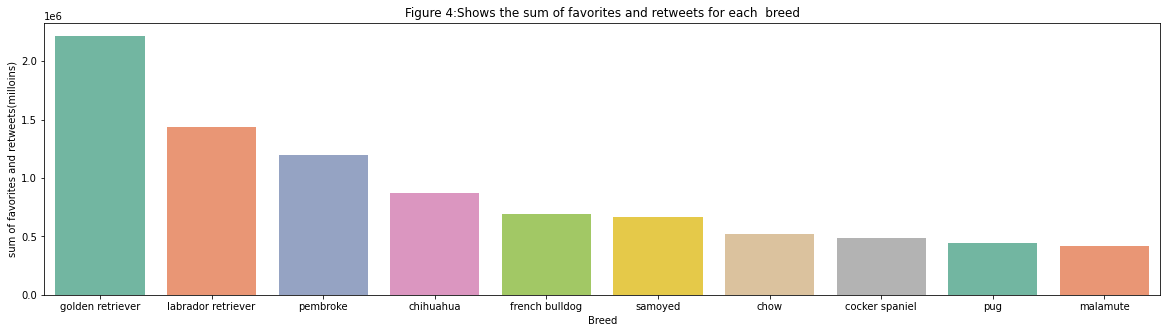

In [157]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.barplot(x = "breed", y = "sum", data = df_breed_group.sort_values("sum", ascending=False).iloc[:10], palette = "Set2")
ax.set(xlabel='Breed', ylabel='sum of favorites and retweets(milloins)')
ax.set_title("Figure 4:Shows the sum of favorites and retweets for each  breed");

***Now let's look at the most retweetet and favorited single tweet.***

In [158]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("retweet_count", ascending = False).head(5)

retweet_count  favorite_count               breed
678  75495          152564          labrador retriever
705  56198          112792          eskimo dog        
356  55043          117792          chihuahua         
271  42522          130176          lakeland terrier  
53   39630          97211           english springer

In [159]:
df[["retweet_count", "favorite_count", "breed"]].sort_values("favorite_count", ascending = False).head(5)

retweet_count  favorite_count               breed
678  75495          152564          labrador retriever
271  42522          130176          lakeland terrier  
356  55043          117792          chihuahua         
99   32084          113983          french bulldog    
705  56198          112792          eskimo dog

***We can see that the most liked and retweeted tweet is in fact a labrador retriever, with golden retrievers not even being in the list. Let's see if there are big differences in the average rating.***

In [160]:
df_breed_group_mean = df[["rating_numerator", "breed"]].groupby("breed", as_index = False).mean()

In [161]:
df_breed_group_mean.sort_values("rating_numerator", ascending = False).head(5)

breed  rating_numerator
96   soft-coated wheaten terrier  21.357143       
109  west highland white terrier  14.687500       
48   great pyrenees               14.666667       
16   borzoi                       14.333333       
28   chow                         14.166667

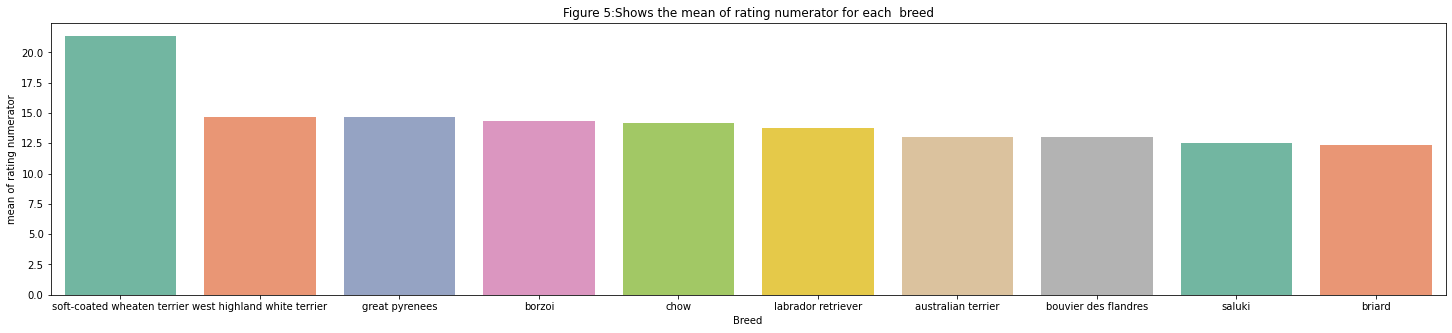

In [162]:
fig, ax = plt.subplots(figsize = (25,5))
ax = sns.barplot(x = "breed", y = "rating_numerator",  data = df_breed_group_mean.sort_values("rating_numerator", ascending = False).iloc[:10], palette = "Set2")
ax.set(xlabel='Breed', ylabel='mean of rating numerator')
ax.set_title("Figure 5:Shows the mean of rating numerator for each  breed");

In [163]:
df[["breed", "rating_numerator"]].sort_values("rating_numerator", ascending = False).head(5)

breed  rating_numerator
583   labrador retriever           165.0           
1222  chow                         144.0           
1116  soft-coated wheaten terrier  121.0           
823   golden retriever             99.0            
1269  labrador retriever           88.0

In [164]:
len(df.query("breed == 'labrador retriever'"))

103

In [165]:
len(df.query("breed == 'soft-coated wheaten terrier'"))

14

In [166]:
df.query("breed != 'soft-coated wheaten terrier'").rating_numerator.mean()

11.261754169240271

***The soft-coated wheaten terrier got a very high mean rating. In fact, the labrador retriever got overall the biggest rating with 165, but since there are a lot more tweets with labrador retriever than for the soft-coated wheaten terrier, the one big rating of the soft-coated wheaten terrier has a higher weight then the one of the labrador retriever (14 tweets of soft-coated wheaten terrier and 103 of labrador retriever).***

***Based on the number of posts, retweets, favorites and mean rating, we will give the title of "Most overall liked dog of this Twitter account and its community" to the labrador retriever.***

#### <font size=4 color =#234790> Question No.4 Where dose the trend of tweets posted go over time in WeRateDogs™ ?</font>

## <font size=2 color = '3A0101'>Lets extracting year and month from timestamp.</font>

In [167]:
df['year_month'] =df['timestamp'].apply(lambda x:x.strftime('%Y-%m'))

In [168]:
df['year_month'].value_counts().sort_index()

2015-11    217
2015-12    276
2016-01    134
2016-02    91 
2016-03    104
2016-04    48 
2016-05    48 
2016-06    66 
2016-07    77 
2016-08    47 
2016-09    55 
2016-10    60 
2016-11    44 
2016-12    52 
2017-01    59 
2017-02    59 
2017-03    41 
2017-04    33 
2017-05    35 
2017-06    40 
2017-07    46 
2017-08    1  
Name: year_month, dtype: int64

In [169]:
data = pd.DataFrame(df.groupby('year_month')['tweet_id'].count())

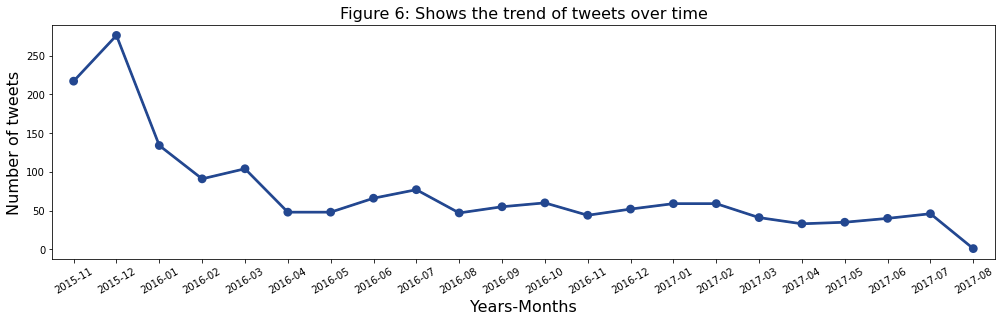

In [170]:
plt.figure(figsize=(14,4))
data['tweet_id'].plot(kind='line')
x = data.index
y = data['tweet_id']
sns.pointplot(x=x, y=y, color='#234790')
plt.tight_layout()
plt.xlabel('Years-Months', fontsize=16)
plt.ylabel("Number of tweets", fontsize=16)
plt.title('Figure 6: Shows the trend of tweets over time', fontsize=16)
plt.xticks(rotation =30 );

***From the figure 6 , we can observe the number of tweets in WeRateDogs profile are decreasing over time.***

<a id='conclusion'></a>
## Conclusion


<font size=4 color ='black'> In Data anlaysis section  we have tried to answer the following questions:
<ul>
    
<font size=4 color ='black'>

1- What is the most device used  for Twitter in WeRateDogs™ ?

<font size=3 color ='blue'>Figure1  shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDeck and Twitter Web Client rare (less than 1%)</font>
    
2- What is the most popular dog in WeRateDogs™ ?
    
<font size=3 color ='blue'>Figure2 shows dog-class that ‘pupper’ (a small doggo, usually younger) is the most popular dog-class, followed by ‘doggo’, ‘puppo’ , 'floofer' and 'doggopupper'. It could be due to the young and unmatured dog is usually cuter than the adult dog.</font>
    
3- Based on predicted the most likely dog breed, Which breed gets retweeted and favorited the most overall in WeRateDogs™ ?

 <font size=3 color='blue'>Based on the number of posts, retweets, favorites and mean rating, we will give the title of "Most overall liked dog of this Twitter account and its community" to the labrador retriever.</font>    
    
4- Where dose the trend of tweets posted go over time in WeRateDogs™ ?
    
<font size= 3 color= 'blue'>Figure 6 shows the number of tweets in WeRateDogs profile are decreasing over time
</font>